---
# **ACTIVIDAD 2: Bosque aleatorio o KNN**

---

Realizado por: Daniel Casañas

Fecha: 31 de marzo de 2023

---
# **1. Instalación**

---

|

In [ ]:
!pip install mplcursors
!pip install pandas plotly
!pip install selenium
!pip install python-docx
!pip install python-Levenshtein
!pip install plotly
!pip install fuzzywuzzy

### 1.2  Módulos

In [2]:
# Importar bibliotecas

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
import statsmodels.formula.api as smf
import math
import pandas as pd


# Importar Sub - Bibliotecas

from tabulate import tabulate
from scipy.stats import rankdata
from IPython.display import display,HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from fuzzywuzzy import fuzz
from tabulate import tabulate


---
# **2. Marco de datos**

---

In [124]:
# Importar el archivo CSV
df = pd.read_csv("/content/WC.csv")

# Imprime las primeras filas del DataFrame
df.head()


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


---
# **3. Análisis exploratorio**

---

### 3.1  Estructura de la matriz

In [125]:
df.shape
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("El DataFrame tiene", df.shape[0], "filas y", df.shape[1], "columnas.")

Respuesta:
El DataFrame tiene 178 filas y 14 columnas.


### 3.2  Identificación Dtype por variable

In [126]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
df.info()

Respuesta:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64

In [127]:
# Seleccionar columnas categóricas
column_names = ['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.columns = column_names

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Seleccionar columnas numéricas
numerical_features = df.select_dtypes(include=['float', 'int']).columns.tolist()

#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")

# Imprimir las columnas seleccionadas
print("Columnas categóricas:", categorical_features)
print("Columnas numéricas:", numerical_features)

Respuesta:
Columnas categóricas: []
Columnas numéricas: ['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']


### 3.3  Verificación de valores en un DataFrame

In [128]:
# Verificar los valores nulos
null_values = df.isnull().sum()

# Imprimimos el resultado
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(null_values)


Respuesta:
Class label                     0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavonoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


### 3.4  Identificación de duplicados

Vaerificación de nombres parecidos en cada columna

In [129]:

# Asignar nombres de columnas a los datos
column_names = ['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.columns = column_names

# Convertir todos los nombres a minúsculas para compararlos
df[column_names] = df[column_names].astype(str).apply(lambda x: x.str.lower())

# Obtener una lista de nombres de columnas únicos
unique_names = df.columns

# Crear un diccionario para almacenar nombres parecidos
similar_names = {}

# Comparar cada par de nombres de columnas únicos y guardar los nombres parecidos
for i, name1 in enumerate(unique_names):
    for name2 in unique_names[i+1:]:
        similarity = fuzz.token_sort_ratio(name1, name2)
        if similarity > 80:
            if name1 in similar_names:
                similar_names[name1].append(name2)
            else:
                similar_names[name1] = [name2]

# Ordenar los nombres de columnas alfabéticamente
unique_names_sorted = sorted(unique_names)

# Mostrar los nombres parecidos
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("Nombres parecidos:")
for name, similar in similar_names.items():
    print("{}: {}".format(name, similar))


Respuesta:
Nombres parecidos:


Verificación de comas y puntos en cada columna

In [130]:
import pandas as pd
import math

# Importar el archivo CSV
df = pd.read_csv("/content/WC.csv")

# Crear un diccionario para almacenar los resultados
conteo = {}

# Iterar por cada columna
for col in df.columns:
    # Seleccionar la columna
    columna = df[col]
    
    # Contador de valores
    total = len(columna)
    contador_nan = 0
    contador_float = 0
    contador_int = 0
    contador_object = 0
    
    # Iterar por cada fila de la columna
    for valor in columna:
        # Verificar el tipo de dato del valor
        if isinstance(valor, float):
            if math.isnan(valor):
                contador_nan += 1
            else:
                contador_float += 1
        elif isinstance(valor, int):
            contador_int += 1
        elif isinstance(valor, str):
            contador_object += 1
    
    # Almacenar los resultados en el diccionario
    conteo[col] = [total, contador_nan, contador_float, contador_int, contador_object]

# Convertir el diccionario en un dataframe
df_conteo = pd.DataFrame.from_dict(conteo, orient='index', columns=["Total", "NaN", "Floats", "Ints", "Objects"])

# Imprimir el dataframe
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(df_conteo)



Respuesta:
                              Total  NaN  Floats  Ints  Objects
Class label                     178    0       0   178        0
Alcohol                         178    0     178     0        0
Malic Acid                      178    0     178     0        0
Ash                             178    0     178     0        0
Alcalinity of ash               178    0     178     0        0
Magnesium                       178    0       0   178        0
Total phenols                   178    0     178     0        0
Flavanoids                      178    0     178     0        0
Nonflavonid phenols             178    0     178     0        0
Proanthocyanins                 178    0     178     0        0
Color intensity                 178    0     178     0        0
Hue                             178    0     178     0        0
OD280/OD315 of diluted wines    178    0     178     0        0
Proline                         178    0       0   178        0


### 3.5  Punto de Control

In [131]:
# Generar una copia del DataFrame con otro nombre
df_V1_copy = df.copy()
# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_V1_copy.to_csv("/content/WC_V1.csv", index=False)
# Importar el archivo CSV
df_V1 = pd.read_csv("/content/WC_V1.csv")

---
# **4. Limpieza de base de datos**

---


No aplica

---
# **5. Análisis descriptivo**

---


### 5.1  Análisis de medidas de tendencia central

In [84]:
# Importar el archivo CSV
df_V1 = pd.read_csv("/content/WC_V1.csv")

In [132]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
df_V1. describe()

Respuesta:


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [133]:
# Seleccionar solo las columnas numéricas
df_numeric = df_V1.select_dtypes(include=np.number)

# Calcular la desviación estándar y el promedio solo en las columnas numéricas
desv_std = df_numeric.std().tolist()
promedio = df_numeric.mean().tolist()

# Calcular el resultado y redondearlo a 2 decimales
resultado = [(a / b) * 100 for a, b in zip(desv_std, promedio)]
resultado = [round(x, 2) for x in resultado]

# Crear un DataFrame con el resultado y mostrarlo
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
tabla = pd.DataFrame({"Varianza (%)": resultado}, index=df_numeric.columns)
print(tabla)

Respuesta:
                              Varianza (%)
Class label                          39.99
Alcohol                               6.24
Malic Acid                           47.82
Ash                                  11.59
Alcalinity of ash                    17.13
Magnesium                            14.32
Total phenols                        27.27
Flavanoids                           49.22
Nonflavonid phenols                  34.39
Proanthocyanins                      35.98
Color intensity                      45.83
Hue                                  23.87
OD280/OD315 of diluted wines         27.19
Proline                              42.16


### 5.2  Análisis de dispersión

Index(['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


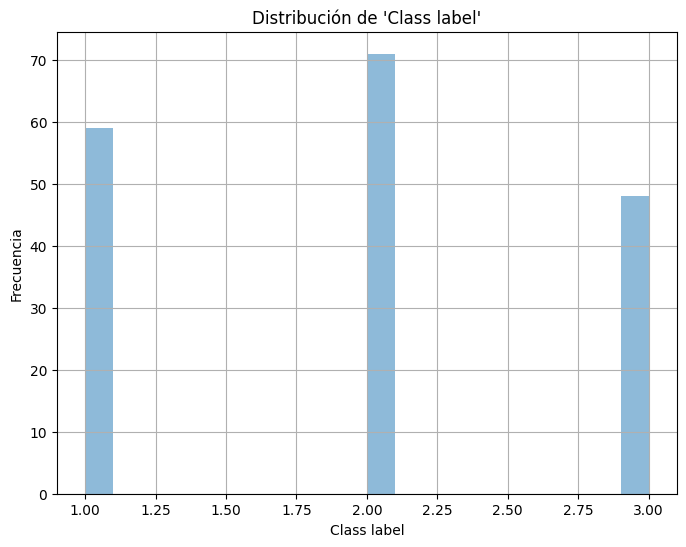

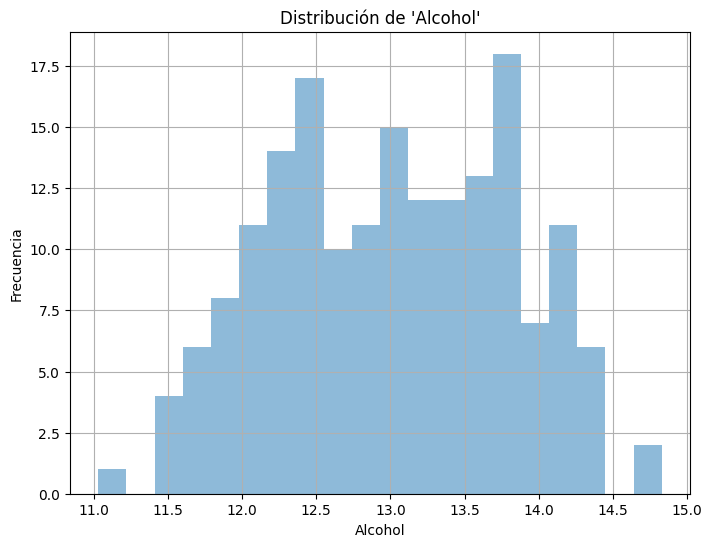

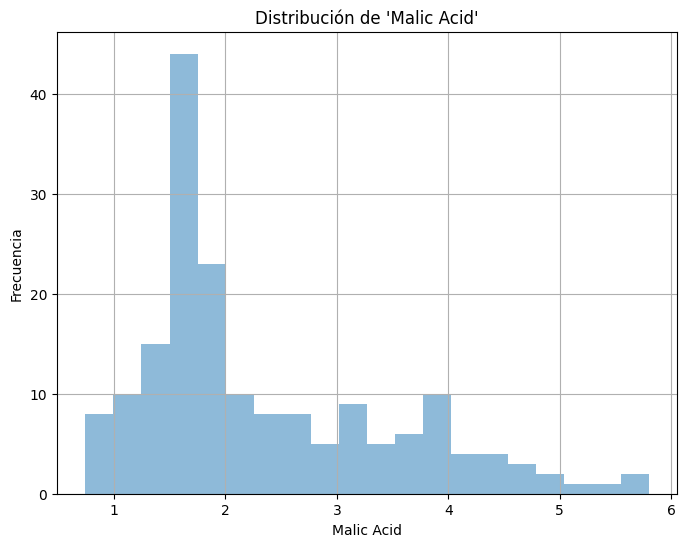

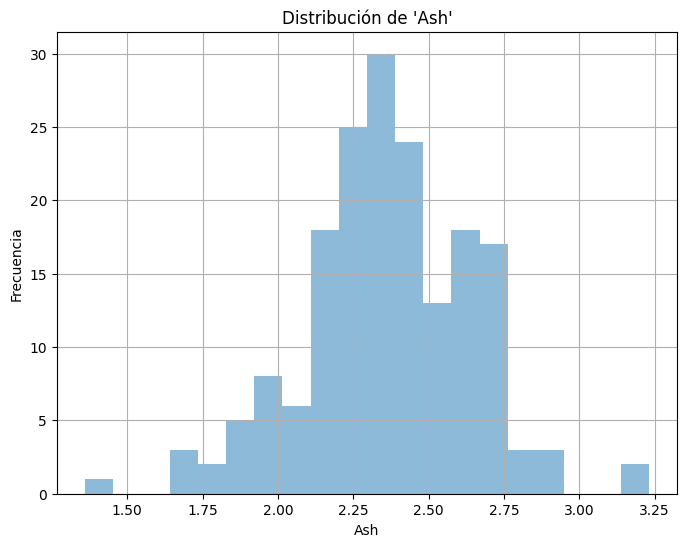

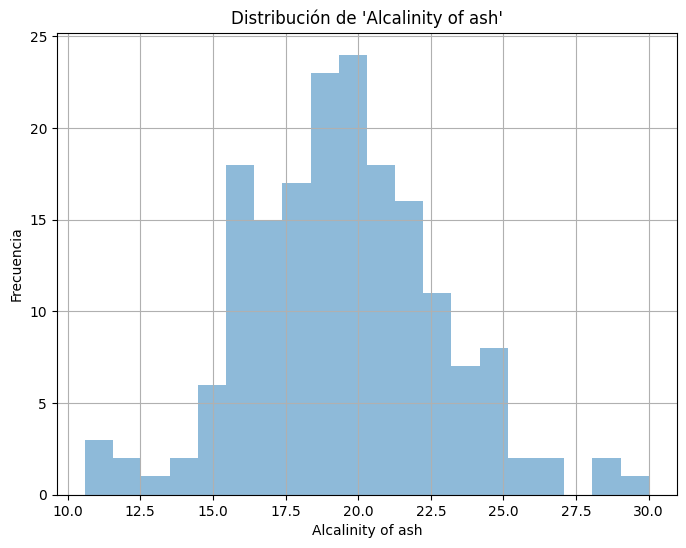

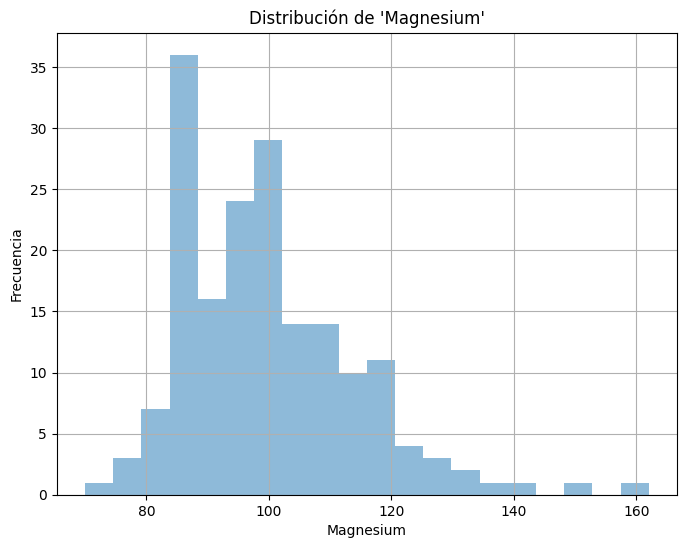

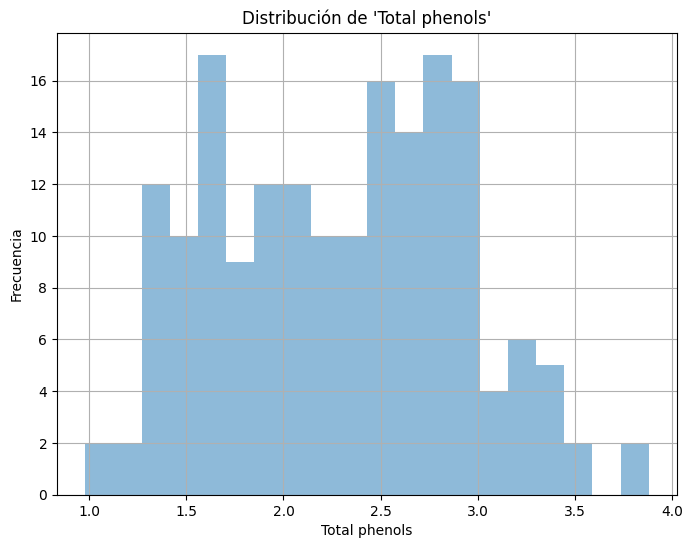

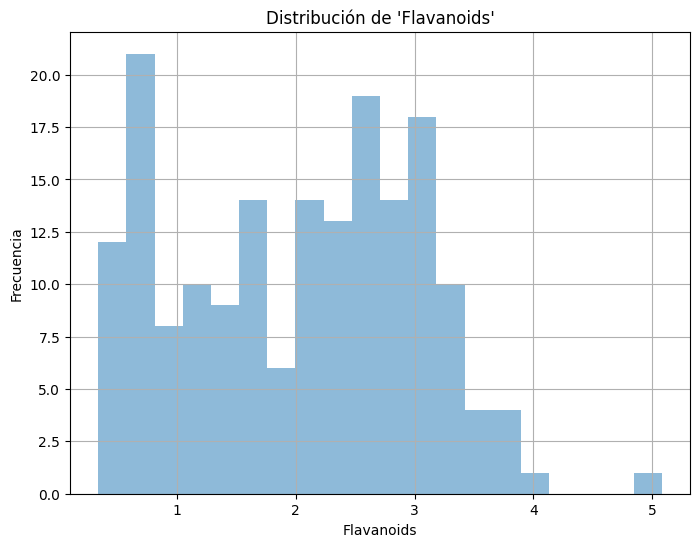

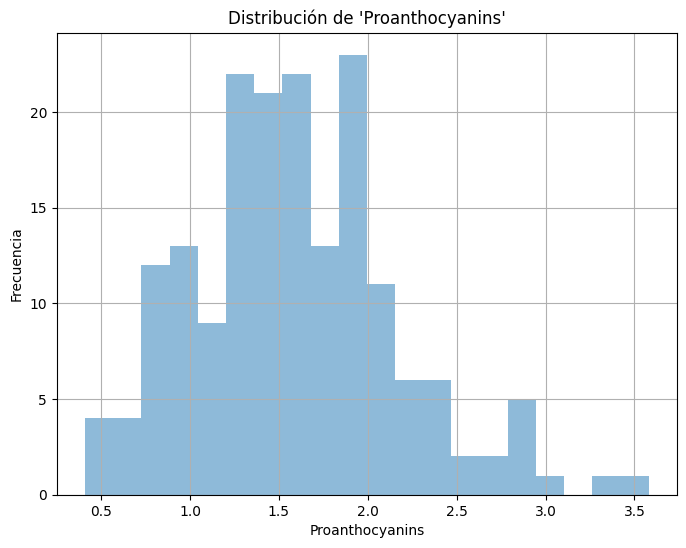

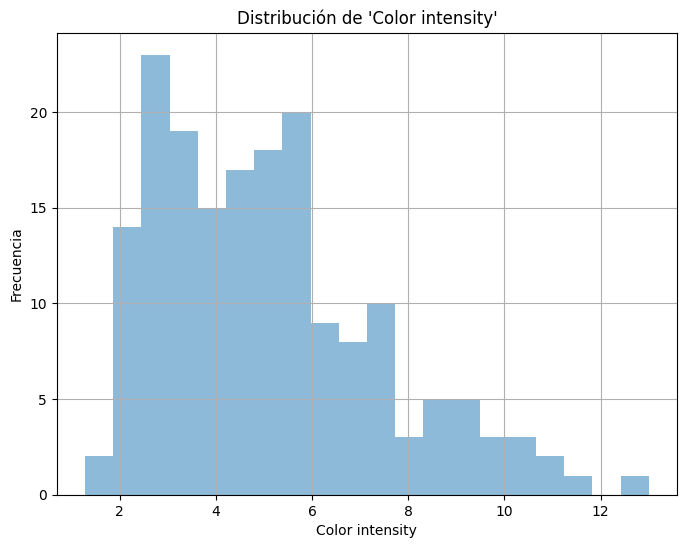

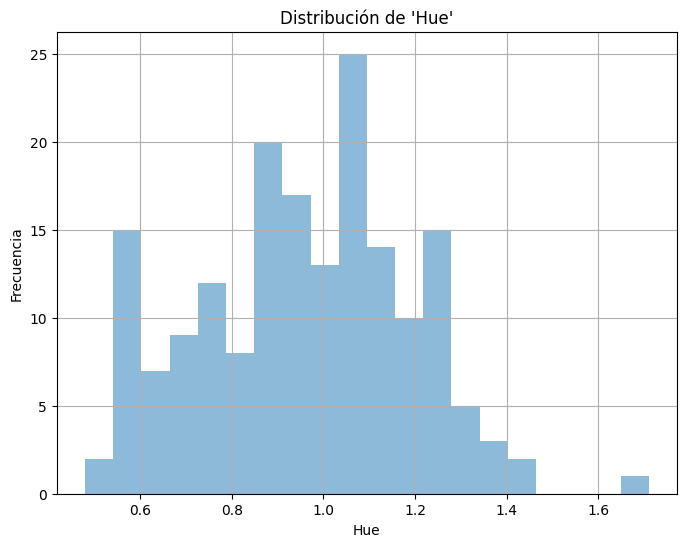

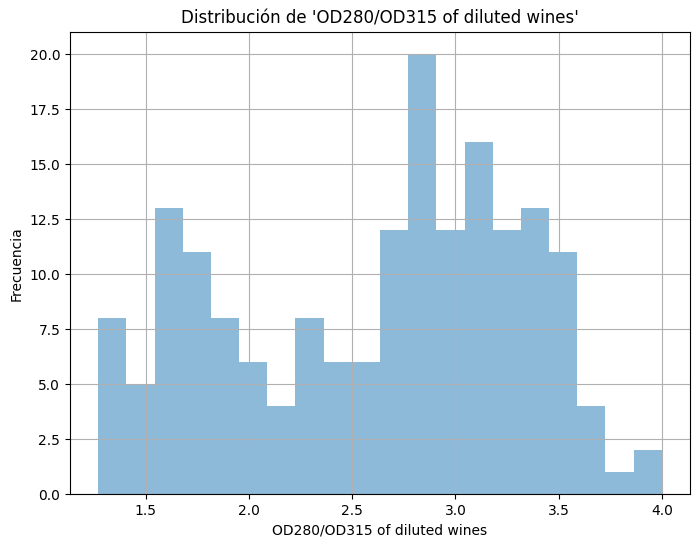

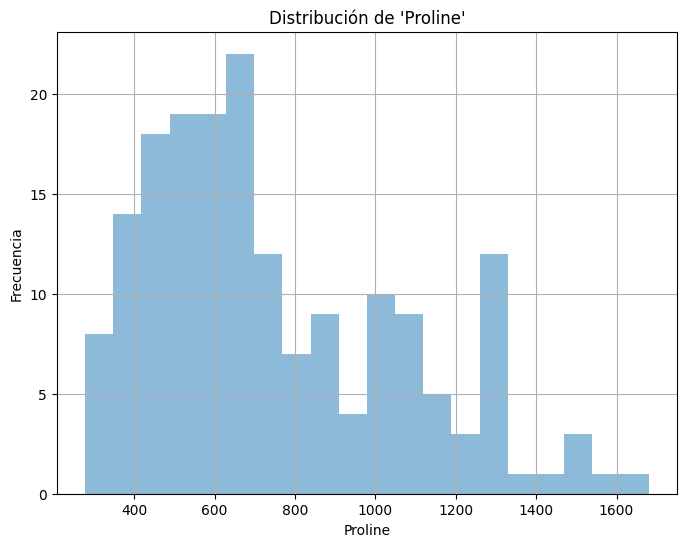

In [134]:
# Crear una función para describir características numéricas con histogramas
def desc_num_feature(df, feature_name):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    df[feature_name].hist(bins=20, alpha=0.5, ax=ax)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Distribución de '{feature_name}'")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

# Iterar a través de la lista de nombres de características numéricas y llamar a la función desc_num_feature para cada una
column_names = ['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print(df_V1.columns)  # Imprimir los nombres de las columnas para verificar el nombre correcto de la columna
for feature_name in column_names:
    desc_num_feature(df_V1, feature_name)



### 5.3  Correlación

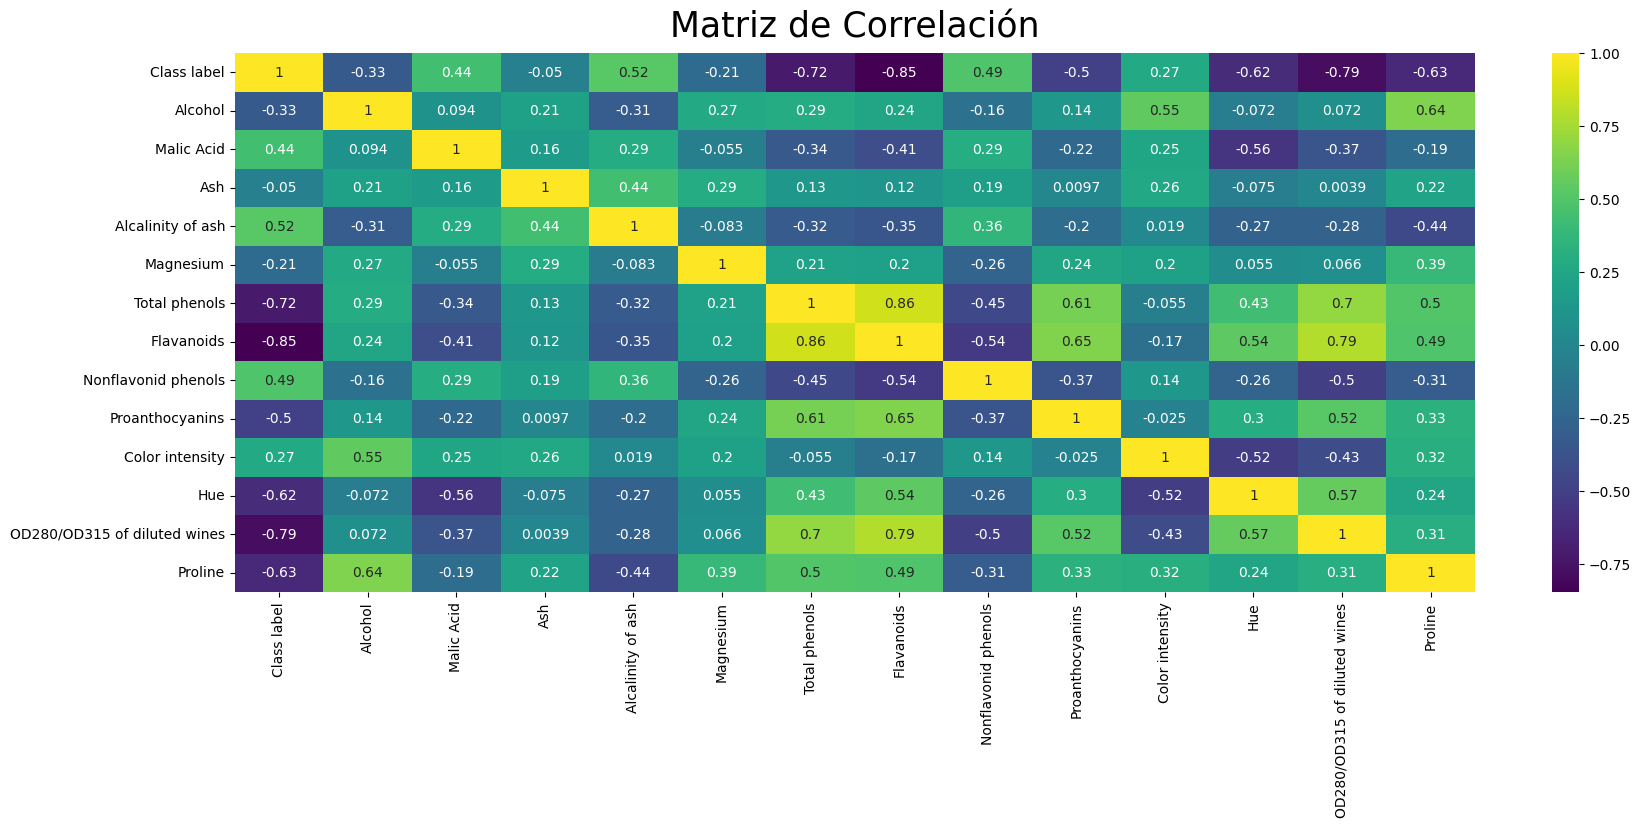

In [135]:
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df_V1.corr(), cmap="viridis", annot=True)
heatmap.set_title("Matriz de Correlación", fontdict={"fontsize": 25}, pad=12)
plt.show()

---
# **6. Arbol de decisión**

---

In [136]:
# Agregar los nombres de las columnas
df_V1.columns = ['Class label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Convertir los valores de las columnas a numéricos
columnas_numericas = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df[columnas_numericas] = df_V1[columnas_numericas].apply(pd.to_numeric)

# Agregar dos decimales a los valores numéricos
pd.options.display.float_format = '{:.2f}'.format      

# Separar los datos en una matriz de características (X) y un vector objetivo (y)
X = df_V1.drop(['Class label'], axis=1)  # Se eliminan las columnas que no son el vector objetivo
y = df_V1['Class label']

# Imprimir la matriz de características (X) en formato de tabla
print("\n\033[43m\033[30m\033[1mMatriz de características (X):\033[0m")
print(X.head().to_string(index=False, header=True))

# Imprimir el vector objetivo (y) en formato de tabla
print("\n\033[43m\033[30m\033[1mVector objetivo (y):\033[0m")
print(y.head().to_string(index=False, header=True))




Matriz de características (X):
 Alcohol  Malic Acid  Ash  Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavonoid phenols  Proanthocyanins  Color intensity  Hue  OD280/OD315 of diluted wines  Proline
   14.23        1.71 2.43              15.60        127           2.80        3.06                  0.28             2.29             5.64 1.04                          3.92     1065
   13.20        1.78 2.14              11.20        100           2.65        2.76                  0.26             1.28             4.38 1.05                          3.40     1050
   13.16        2.36 2.67              18.60        101           2.80        3.24                  0.30             2.81             5.68 1.03                          3.17     1185
   14.37        1.95 2.50              16.80        113           3.85        3.49                  0.24             2.18             7.80 0.86                          3.45     1480
   13.24        2.59 2.87              21.00        1

In [137]:
# Definir X_train y X_test
X = df_V1[['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']]
y = df_V1['Class label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir las transformaciones
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Definir las columnas que serán transformadas
num_features = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Definir el preprocesamiento
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features)])

# Ajustar el preprocesamiento en el conjunto de entrenamiento
preprocessor.fit(X_train)

# Transformar los conjuntos de entrenamiento y prueba
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convertir a DataFrames de pandas
X_train_transformed = pd.DataFrame(X_train_transformed, columns=num_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=num_features)

# Mostrar los DataFrames resultantes
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("Conjunto de entrenamiento transformado (forma):", X_train_transformed.shape)
print(X_train_transformed.head())
print("Conjunto de prueba transformado (forma):", X_test_transformed.shape)
print(X_test_transformed.head())


Respuesta:
Conjunto de entrenamiento transformado (forma): (142, 13)
   Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0     0.88        0.80  0.64               0.13       0.49          -0.70   
1    -0.37       -0.76 -0.40               0.33      -1.41          -1.44   
2    -1.70       -0.34 -0.32              -0.45      -0.15           1.25   
3     0.52        1.38  0.42               1.00       0.14          -0.75   
4     0.64       -0.51  0.90               0.13      -0.29           0.45   

   Flavanoids  Nonflavonoid phenols  Proanthocyanins  Color intensity   Hue  \
0       -1.43                  1.07            -1.37             0.35  0.03   
1       -0.50                  1.70             0.02            -0.84  0.03   
2        0.32                 -1.52            -0.43            -0.76  0.90   
3       -1.23                  0.52            -0.33             0.95 -1.11   
4        0.68                 -0.66             0.09            -0.64  0.

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Ajustar un modelo de regresión en los datos de entrenamiento
reg_model = LinearRegression()
reg_model.fit(X_train_transformed, y_train)

# Evaluar el rendimiento del modelo en los datos de entrenamiento
train_r2 = r2_score(y_train, reg_model.predict(X_train_transformed))

# Evaluar el rendimiento del modelo en los datos de prueba
test_r2 = r2_score(y_test, reg_model.predict(X_test_transformed))

print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("R^2 en datos de entrenamiento: {:.4f}".format(train_r2))
print("R^2 en datos de prueba: {:.4f}".format(test_r2))


Respuesta:
R^2 en datos de entrenamiento: 0.9191
R^2 en datos de prueba: 0.7644


In [139]:
# Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir los valores de y para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)

# Imprimir el resultado
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("El error absoluto medio es:", mae)

Respuesta:
El error absoluto medio es: 0.2625947194926845


In [93]:
from sklearn.metrics import mean_squared_error

# Entrenar el modelo
model.fit(X_train_transformed, y_train)

# Predecir los valores del conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# Calcular el RECM en los conjuntos de entrenamiento y prueba
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Mostrar los resultados con 2 decimales
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("RECM en el conjunto de entrenamiento: {:.2f}".format(rmse_train))
print("RECM en el conjunto de prueba: {:.2f}".format(rmse_test))

Respuesta:
RECM en el conjunto de entrenamiento: 0.22
RECM en el conjunto de prueba: 0.35


In [94]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")

# Imprimir los conjuntos de entrenamiento y prueba en formato de tabla
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Conjunto de entrenamiento:")
print(pd.concat([X_train, y_train], axis=1).head().to_string(index=False))

print("Conjunto de prueba:")
print(pd.concat([X_test, y_test], axis=1).head().to_string(index=False))

Respuesta:
Conjunto de entrenamiento:
 Alcohol  Malic Acid  Ash  Alcalinity of ash  Magnesium  Total phenols  Flavanoids  Nonflavonoid phenols  Proanthocyanins  Color intensity  Hue  OD280/OD315 of diluted wines  Proline  Class label
   13.49        3.59 2.19              19.50         88           1.62        0.48                  0.58             0.88             5.70 0.81                          1.82      580            3
   12.51        1.73 1.98              20.50         85           2.20        1.92                  0.32             1.48             2.94 1.04                          3.57      672            2
   12.33        0.99 1.95              14.80        136           1.90        1.85                  0.35             2.76             3.40 1.06                          2.31      750            2
   13.28        1.64 2.84              15.50        110           2.60        2.68                  0.34             1.36             4.60 1.09                          2.78     

In [95]:
from sklearn.tree import DecisionTreeRegressor

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenar el modelo de regresión del árbol de decisión
regtree = DecisionTreeRegressor(max_depth=4, random_state=0)
regtree.fit(X_train, y_train)

from sklearn.tree import DecisionTreeRegressor

RT = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=7, random_state=0)

RT.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

Respuesta:


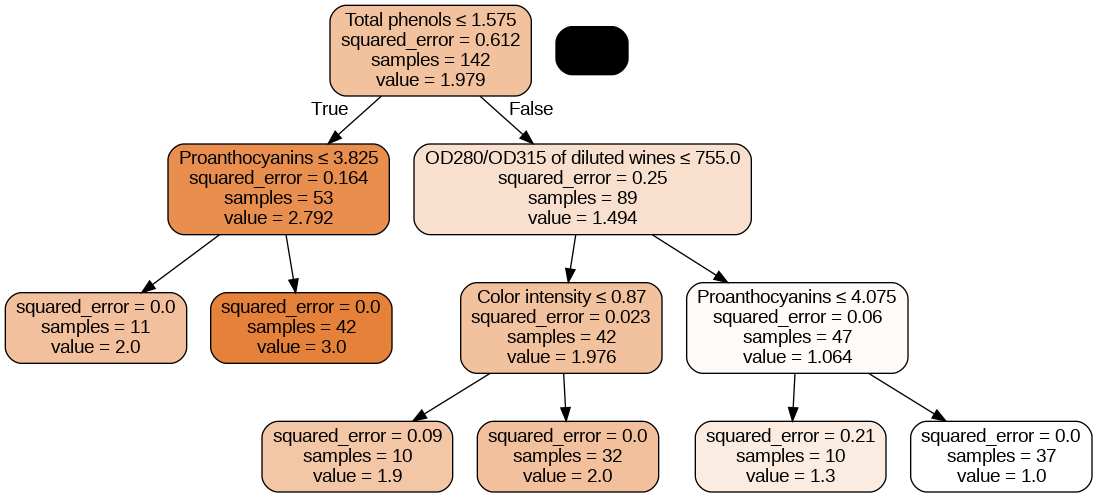

In [96]:
# Import necessary libraries for decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# Define the regressor object
RT = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=7, random_state=0)

# Fit the regressor to the training data
RT.fit(X_train, y_train)

# Import necessary libraries for graph viz
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO

# Visualize the graph
dot_data = StringIO()
export_graphviz(RT, feature_names=df_V1.columns[:13],  
                filled=True, rounded=True,
                special_characters=True, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")  
Image(graph.create_png())

In [97]:
regtree = DecisionTreeRegressor()
regtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [98]:
preds = regtree.predict(X_test)
preds


array([1., 3., 2., 1., 2., 2., 1., 3., 2., 2., 3., 3., 1., 2., 3., 2., 1.,
       1., 3., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 3., 1., 1., 1., 1.,
       1., 1.])

In [99]:
df_V1 = pd.DataFrame()

In [116]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

# Importar el archivo CSV
df_V1 = pd.read_csv("/content/WC_V1.csv")

# Seleccionar columnas categóricas
categorical_features = ['Class label']

# Seleccionar columnas numéricas
numerical_features = ['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavonoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Separar en X e y
X = df[numerical_features]
y = df[categorical_features]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Entrenar el modelo
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Hacer las predicciones sobre el set de prueba
preds = dt.predict(X_test)

# Calcular el error cuadrático medio y mostrarlo
mse = mean_squared_error(y_test, preds)
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")  
print("El error cuadrático medio es:", mse)



Respuesta:
El error cuadrático medio es: 0.05555555555555555


---
# **7. Random forest**

---

In [104]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_jobs=10, oob_score=True, n_estimators=10000)
forest.fit(X_train, y_train.values.ravel())



RandomForestRegressor(n_estimators=10000, n_jobs=10, oob_score=True)

In [111]:
# Crear modelo de Random Forest
forest = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=1)
forest.fit(X, y.to_numpy().ravel())

# Agregar predicciones out-of-bag a DataFrame
df_V1 = pd.DataFrame({"Class label": y.to_numpy().ravel()}, index=X.index)

df_V1["rforest_pred"] = forest.oob_prediction_

# Seleccionar solo las dos columnas necesarias
df_V1 = df_V1[["rforest_pred", "Class label"]]

# Realizar predicciones sobre datos de prueba
preds2 = forest.predict(X_test)



In [117]:
from sklearn.model_selection import train_test_split

# Split de data para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en test data
preds = model.predict(X_test)

# Calcular error cuadratico
squared_errors = (preds - y_test) ** 2

# Calcular error cuadratico
mean_squared_error = squared_errors.mean()

print("\033[43m\033[30m\033[1mRespuesta:\033[0m")  
print("Mean squared error:", mean_squared_error)



Respuesta:
Mean squared error: Class label   0.07
dtype: float64


In [119]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Importar el archivo CSV
df_V1 = pd.read_csv("/content/WC_V1.csv")


# Split en data deature (X) and objetivo (y)
X = df_V1.drop("Class label", axis=1)
y = df_V1["Class label"]

#Imprimir 
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")  
print(X.shape)  

# Forest model
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)

# Calcular feature importances
feat_importances = pd.Series(forest.feature_importances_, index=df_V1.columns[:-1])


# Imprimir
print(feat_importances)

Respuesta:
(178, 13)
Class label                    0.05
Alcohol                        0.00
Malic Acid                     0.00
Ash                            0.00
Alcalinity of ash              0.01
Magnesium                      0.00
Total phenols                  0.40
Flavanoids                     0.00
Nonflavonid phenols            0.00
Proanthocyanins                0.10
Color intensity                0.02
Hue                            0.21
OD280/OD315 of diluted wines   0.20
dtype: float64


Respuesta:


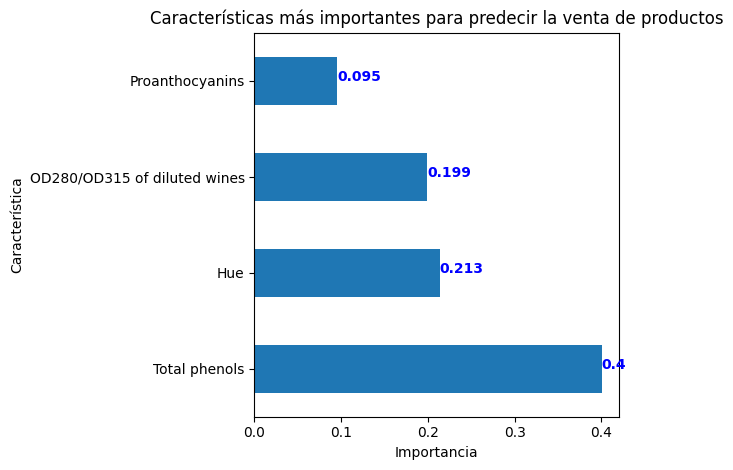

In [120]:
# Generar gráfico de barras con las 4 características más importantes
feat_importances.nlargest(4).plot(kind="barh")

# Agregar etiquetas de valores para cada barra
for i, v in enumerate(feat_importances.nlargest(4)):
    plt.text(v, i, str(round(v, 3)), color='blue', fontweight='bold')

# Ajustar el título y los ejes
plt.title("Características más importantes para predecir la venta de productos")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.tight_layout()
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")  
plt.show()